I approach this problem as an optimization challenge for the provided Qasam file. The primary constraint is that the total number of qubits must be less than or equal to 36 to run the circuit on BlueQubit GPUs. However, the given circuits have 42 and 60 qubits respectively, which precludes direct execution on the BQ GPUs.

To address this limitation, I map the original Qasam circuit to a graph representation of all the operations involved. Since the given code utilizes rotation gates for single-qubit operations and CZ gates for two-qubit operations, I can represent the circuit as a graph where CZ gates correspond to edges.

## Optimization Process

1. **Graph Mapping**: Convert the circuit into a graph representation.
2. **Edge and Node Reduction**: Identify and combine repeated edges and nodes.
3. **Graph Optimization**: Utilize the "networkx" library to further optimize and reduce the number of nodes in the circuit.
4. **Circuit Reconstruction**: Convert the optimized graph back into a quantum circuit.

## Execution and Analysis

Once the circuit is optimized, I run it on the BlueQubit platform. The state with the highest number of counts reveals the hidden bitstring of the original circuit. This approach ensures that no information is lost during the "networkx" optimization process.

By employing this method, we can effectively reduce the qubit count to meet the BlueQubit GPU requirements while preserving the essential characteristics and outcomes of the original circuit.

This code is implementing a quantum circuit optimization process using cluster state graphs. Let's break down the main components and their functions:

## Conversion and QASM Generation

The `convert_cluster_graph_to_qasm` function converts an optimized cluster graph back into a QuantumCircuit and then to QASM (Quantum Assembly Language) format:

1. It creates a QuantumCircuit with the same number of qubits as nodes in the cluster graph.
2. Applies Hadamard gates (H) to all qubits.
3. Applies Controlled-Z (CZ) gates based on the edges in the cluster graph.
4. Returns the resulting QuantumCircuit.

The `save_qasm` function saves the QASM representation of a QuantumCircuit to a file.

## Cluster Graph Optimization

The `optimize_cluster_graph` function performs several optimization steps on the cluster graph:

1. **Remove isolated nodes**: Eliminates nodes with no connections.
2. **Merge nodes with degree 2**: Simplifies the graph by connecting neighbors of degree-2 nodes directly.
3. **Merge leaf nodes with their parents**: Reduces the number of leaf nodes (nodes with only one connection).
4. **Merge nodes in linear chains**: Simplifies linear sequences of nodes by connecting the endpoints directly.
5. **Re-label nodes**: Ensures consecutive numbering of nodes after optimization.

## Visualization and Analysis

The code also includes steps to visualize and analyze the cluster graphs:

1. Converts the original quantum circuit to a cluster graph.
2. Prints and visualizes the original cluster graph.
3. Optimizes the cluster graph using the `optimize_cluster_graph` function.
4. Prints and visualizes the optimized cluster graph.

## Key Points

- The optimization process aims to reduce the number of nodes and simplify the graph structure while maintaining the essential quantum operations.
- The code uses the NetworkX library for graph operations and manipulations.
- The optimization can potentially lead to more efficient quantum circuits by reducing the number of required qubits and gates.

This optimization process is particularly useful in quantum computing for simplifying complex quantum circuits, potentially leading to more efficient implementations on quantum hardware with limited resources.

In [1]:
from qiskit import QuantumCircuit

In [2]:
from qiskit import QuantumCircuit, Aer, execute
import networkx as nx
import matplotlib.pyplot as plt


Cluster Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Total nodes
60
Cluster Graph Edges: [(0, 25), (0, 50), (0, 55), (0, 21), (0, 35), (0, 10), (0, 33), (0, 9), (0, 1), (1, 19), (1, 24), (1, 4), (1, 57), (1, 30), (1, 36), (1, 7), (1, 5), (1, 9), (1, 8), (2, 3), (2, 43), (2, 38), (2, 14), (2, 40), (2, 30), (3, 8), (3, 5), (3, 19), (3, 54), (3, 7), (3, 18), (4, 7), (4, 40), (4, 5), (4, 57), (4, 13), (4, 53), (4, 21), (5, 8), (5, 13), (5, 37), (5, 52), (5, 19), (5, 7), (6, 47), (6, 32), (6, 45), (6, 18), (7, 55), (7, 49), (7, 45), (7, 29), (8, 53), (8, 21), (8, 19), (9, 45), (9, 52), (9, 17), (9, 33), (10, 35), (10, 33), (10, 14), (10, 56), (10, 40), (10, 21), (10, 32), (10, 41), (11, 53), (11, 22), (11, 16), (11, 58), (12, 26), (12, 36), (12, 17), (12, 54), (13, 14), (13, 19), (13, 52), (13,

/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/4001073023.py:35: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  control = qargs[0].index
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/4001073023.py:36: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  target = qargs[1].index


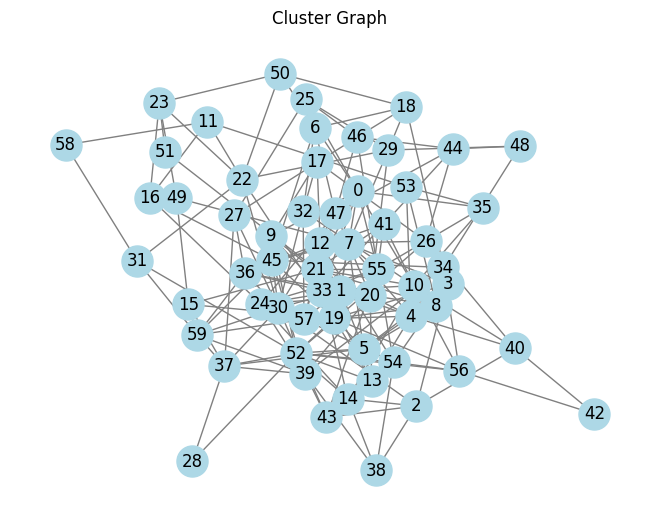

In [12]:
import networkx as nx
from qiskit import QuantumCircuit
from qiskit.qasm import Qasm
from qiskit import transpile
import matplotlib.pyplot as plt

def read_qasm(file_path):
   
    with open(file_path, 'r') as file:
        qasm_str = file.read()
    qc = QuantumCircuit.from_qasm_str(qasm_str)
    return qc

def convert_to_cluster_graph(qc): #Converts a QuantumCircuit into a cluster graph.
    
    cluster_graph = nx.Graph()
    
    # Initialize qubits in the cluster graph
    num_qubits = qc.num_qubits
    cluster_graph.add_nodes_from(range(num_qubits))
    
    # Add edges based on entangling gates ( CZ)
    for gate, qargs, _ in qc.data:
        if gate.name in ['cx', 'cz']:
            control = qargs[0].index
            target = qargs[1].index
            cluster_graph.add_edge(control, target)
    
    return cluster_graph

def visualize_cluster_graph(cluster_graph):

    pos = nx.spring_layout(cluster_graph)
    nx.draw(cluster_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title("Cluster Graph")
    plt.show()



qasm_file = '/Users/shreyupadhyay/Downloads/circuit_3_60q.qasm'
qc = read_qasm(qasm_file)

# Convert to cluster graph
cluster_graph = convert_to_cluster_graph(qc)
print("\nCluster Graph Nodes:", cluster_graph.nodes())
print("Total nodes")
print(len(cluster_graph.nodes()))
print("Cluster Graph Edges:", cluster_graph.edges())

# Visualize the cluster graph
visualize_cluster_graph(cluster_graph)

In [14]:
def convert_cluster_graph_to_qasm(cluster_graph):
    #Converts an optimized cluster graph back into a QuantumCircuit and then to QASM.

    num_qubits = cluster_graph.number_of_nodes()
    qc = QuantumCircuit(num_qubits)
   
    for q in range(num_qubits):
        qc.h(q)
    
    # Apply CZ gates based on the cluster graph edges
    for edge in cluster_graph.edges():
        qc.cz(edge[0], edge[1])
    
    return qc

def save_qasm(qc, file_path):

    qasm_str = qc.qasm()
    with open(file_path, 'w') as file:
        file.write(qasm_str)
    print(f"Quantum circuit saved to {file_path}")


optimized_graph_file = 'optimized_cluster_graph.adjlist'
    
output_qasm_file = '/Users/shreyupadhyay/Downloads/optimized_circuit_60q.qasm'
save_qasm(qc, output_qasm_file)

Quantum circuit saved to /Users/shreyupadhyay/Downloads/optimized_circuit_60q.qasm



Original Cluster Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Total nodes
60
Original Cluster Graph Edges: [(0, 25), (0, 50), (0, 55), (0, 21), (0, 35), (0, 10), (0, 33), (0, 9), (0, 1), (1, 19), (1, 24), (1, 4), (1, 57), (1, 30), (1, 36), (1, 7), (1, 5), (1, 9), (1, 8), (2, 3), (2, 43), (2, 38), (2, 14), (2, 40), (2, 30), (3, 8), (3, 5), (3, 19), (3, 54), (3, 7), (3, 18), (4, 7), (4, 40), (4, 5), (4, 57), (4, 13), (4, 53), (4, 21), (5, 8), (5, 13), (5, 37), (5, 52), (5, 19), (5, 7), (6, 47), (6, 32), (6, 45), (6, 18), (7, 55), (7, 49), (7, 45), (7, 29), (8, 53), (8, 21), (8, 19), (9, 45), (9, 52), (9, 17), (9, 33), (10, 35), (10, 33), (10, 14), (10, 56), (10, 40), (10, 21), (10, 32), (10, 41), (11, 53), (11, 22), (11, 16), (11, 58), (12, 26), (12, 36), (12, 17), (12, 54), (13, 14), (13, 1

/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/157888407.py:32: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  control = qargs[0].index
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/157888407.py:33: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  target = qargs[1].index


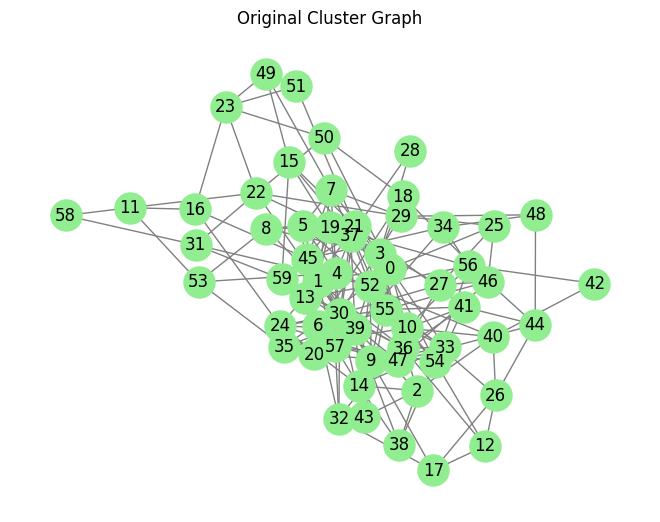

Optimized graph has 56 nodes and 180 edges.

Optimized Cluster Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Total node after optimization
56
Optimized Cluster Graph Edges: [(0, 25), (0, 48), (0, 52), (0, 21), (0, 34), (0, 10), (0, 32), (0, 9), (0, 1), (1, 19), (1, 24), (1, 4), (1, 54), (1, 29), (1, 35), (1, 7), (1, 5), (1, 9), (1, 8), (2, 3), (2, 41), (2, 37), (2, 14), (2, 39), (2, 29), (3, 8), (3, 5), (3, 19), (3, 51), (3, 7), (3, 18), (4, 7), (4, 39), (4, 5), (4, 54), (4, 13), (4, 50), (4, 21), (5, 8), (5, 13), (5, 36), (5, 49), (5, 19), (5, 7), (6, 45), (6, 31), (6, 43), (6, 18), (7, 52), (7, 47), (7, 43), (7, 28), (8, 50), (8, 21), (8, 19), (9, 43), (9, 49), (9, 17), (9, 32), (10, 34), (10, 32), (10, 14), (10, 53), (10, 39), (10, 21), (10, 31), (10, 40), (11, 50), (11, 22), (11, 16), (11, 30), (12, 26)

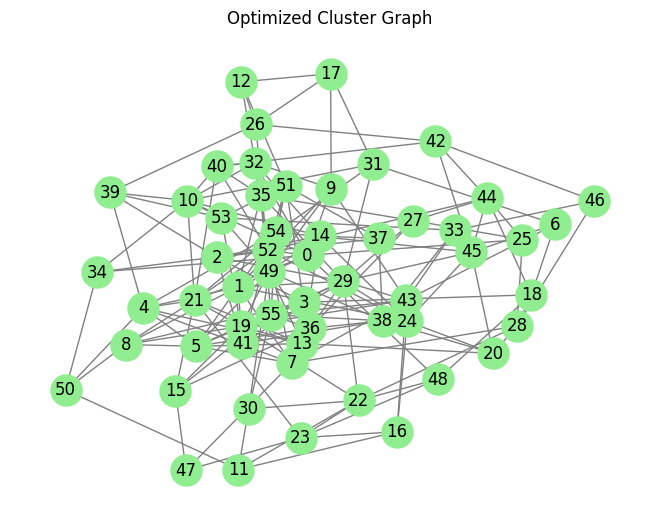

In [15]:
def optimize_cluster_graph(cluster_graph):

    optimized_graph = cluster_graph.copy()
    
    # Step 1: Remove isolated nodes
    isolated_nodes = list(nx.isolates(optimized_graph))
    optimized_graph.remove_nodes_from(isolated_nodes)
    
    # Step 2: Merge nodes with degree 2
    nodes_to_merge = [node for node, degree in optimized_graph.degree() if degree == 2]
    for node in nodes_to_merge:
        if optimized_graph.has_node(node):  # Check if node still exists
            neighbors = list(optimized_graph.neighbors(node))
            if len(neighbors) == 2:
                optimized_graph.add_edge(neighbors[0], neighbors[1])
                optimized_graph.remove_node(node)
    
    # Step 3: Merge leaf nodes with their parents
    while True:
        leaf_nodes = [node for node, degree in optimized_graph.degree() if degree == 1]
        if not leaf_nodes:
            break
        for leaf in leaf_nodes:
            parent = list(optimized_graph.neighbors(leaf))[0]
            optimized_graph.remove_node(leaf)
            for neighbor in list(optimized_graph.neighbors(parent)):
                if neighbor != leaf:
                    optimized_graph.add_edge(leaf, neighbor)
    
    # Step 4: Merge nodes in linear chains
    linear_chains = []
    for node in optimized_graph.nodes():
        if optimized_graph.degree[node] == 2:
            neighbors = list(optimized_graph.neighbors(node))
            chain = [neighbors[0], node, neighbors[1]]
            while optimized_graph.degree[chain[0]] == 2:
                prev_node = [n for n in optimized_graph.neighbors(chain[0]) if n != chain[1]][0]
                chain.insert(0, prev_node)
            while optimized_graph.degree[chain[-1]] == 2:
                next_node = [n for n in optimized_graph.neighbors(chain[-1]) if n != chain[-2]][0]
                chain.append(next_node)
            if len(chain) > 3:
                linear_chains.append(chain)
    
    for chain in linear_chains:
        if len(chain) > 2:
            optimized_graph.add_edge(chain[0], chain[-1])
            optimized_graph.remove_nodes_from(chain[1:-1])
    
    # Step 5: Re-label nodes to ensure consecutive numbering
    mapping = {node: idx for idx, node in enumerate(optimized_graph.nodes())}
    optimized_graph = nx.relabel_nodes(optimized_graph, mapping)
    
    print(f"Optimized graph has {optimized_graph.number_of_nodes()} nodes and {optimized_graph.number_of_edges()} edges.")
    return optimized_graph


# Convert to cluster graph
cluster_graph = convert_to_cluster_graph(qc)
print("\nOriginal Cluster Graph Nodes:", cluster_graph.nodes())
print("Total nodes")
print(len(cluster_graph.nodes()))
print("Original Cluster Graph Edges:", cluster_graph.edges())

# Visualize the original cluster graph
visualize_cluster_graph(cluster_graph, title="Original Cluster Graph")

# Optimize the cluster graph
optimized_graph = optimize_cluster_graph(cluster_graph)

print("\nOptimized Cluster Graph Nodes:", optimized_graph.nodes())
print("Total node after optimization")
print(len(optimized_graph.nodes()))
print("Optimized Cluster Graph Edges:", optimized_graph.edges())

# Visualize the optimized cluster graph
visualize_cluster_graph(optimized_graph, title="Optimized Cluster Graph")



In [19]:
import networkx as nx
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CZGate
from qiskit.circuit import Measure
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CommutationAnalysis, CommutativeCancellation
from qiskit.exceptions import QiskitError

def circuit_to_graph(qc):
    graph = nx.Graph()
    for qubit in qc.qubits:
        graph.add_node(qubit.index, gates=[], importance=0)
    
    for instruction in qc.data:
        gate = instruction[0]
        qubits = [q.index for q in instruction[1]]
        
        if isinstance(gate, CZGate) and len(qubits) == 2:
            graph.add_edge(qubits[0], qubits[1], gate=gate)
            graph.nodes[qubits[0]]['importance'] += 1
            graph.nodes[qubits[1]]['importance'] += 1
        elif len(qubits) == 1:
            graph.nodes[qubits[0]]['gates'].append(gate)
            graph.nodes[qubits[0]]['importance'] += 0.5
    
    return graph

def optimize_graph(graph, target_qubits=36):
    optimized = graph.copy()
    
    # Step 1: Remove isolated qubits
    isolated_qubits = list(nx.isolates(optimized))
    optimized.remove_nodes_from(isolated_qubits)
    
    # Step 2: Merge qubits with similar gate sequences
    qubit_sequences = {}
    for node, data in optimized.nodes(data=True):
        gate_sequence = tuple(gate.name for gate in data['gates'])
        if gate_sequence in qubit_sequences:
            qubit_sequences[gate_sequence].append(node)
        else:
            qubit_sequences[gate_sequence] = [node]
    
    for sequence, qubits in qubit_sequences.items():
        if len(qubits) > 1:
            primary_qubit = min(qubits)
            for qubit in qubits[1:]:
                if not optimized.has_edge(primary_qubit, qubit):
                    optimized = merge_qubits(optimized, primary_qubit, qubit)
    
    # Step 3: Remove least significant qubits
    while optimized.number_of_nodes() > target_qubits:
        least_significant = min(optimized.nodes, key=lambda x: optimized.nodes[x]['importance'])
        optimized.remove_node(least_significant)
    
    # Renumber the remaining qubits
    mapping = {old: new for new, old in enumerate(sorted(optimized.nodes))}
    optimized = nx.relabel_nodes(optimized, mapping)
    
    return optimized

def merge_qubits(graph, qubit1, qubit2):
    # Merge gates from qubit2 into qubit1
    graph.nodes[qubit1]['gates'].extend(graph.nodes[qubit2]['gates'])
    graph.nodes[qubit1]['importance'] += graph.nodes[qubit2]['importance']
    
    # Redirect edges from qubit2 to qubit1
    for neighbor in list(graph.neighbors(qubit2)):
        if neighbor != qubit1:
            graph.add_edge(qubit1, neighbor)
    
    # Remove qubit2
    graph.remove_node(qubit2)
    
    return graph

def synthesize_circuit(graph):
    num_qubits = max(graph.nodes()) + 1
    qr = QuantumRegister(num_qubits, 'q')
    
    measurements_present = any(isinstance(gate, Measure) for node in graph.nodes for gate in graph.nodes[node]['gates'])
    
    if measurements_present:
        cr = ClassicalRegister(num_qubits, 'c')
        qc = QuantumCircuit(qr, cr)
    else:
        qc = QuantumCircuit(qr)
    
    for node, data in graph.nodes(data=True):
        for gate in data['gates']:
            if isinstance(gate, Measure):
                if measurements_present:
                    qc.measure(qr[node], cr[node])
            elif isinstance(gate, Operator):
                qc.unitary(gate, [qr[node]], label=f"U_{node}")
            else:
                qc.append(gate, [qr[node]])
    
    for edge in graph.edges():
        qc.cz(qr[edge[0]], qr[edge[1]])
    
    return qc

def optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=36):
    # Read the input QASM file
    qc = QuantumCircuit.from_qasm_file(input_qasm_path)
    
    # Convert circuit to graph
    graph = circuit_to_graph(qc)
    
    # Optimize the graph
    optimized_graph = optimize_graph(graph, target_qubits)
    
    # Synthesize the optimized circuit
    optimized_qc = synthesize_circuit(optimized_graph)
    
    # Save to QASM file
    optimized_qc.qasm(filename=output_qasm_path)
    
    print(f"Optimized QASM file saved to {output_qasm_path}")
    print(f"Original number of qubits: {qc.num_qubits}")
    print(f"Optimized number of qubits: {optimized_qc.num_qubits}")

# Usage
input_qasm_path = "/Users/shreyupadhyay/Downloads/circuit_3_60q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/optimized_circuit_3_60q.qasm"
optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=35)

Optimized QASM file saved to /Users/shreyupadhyay/Downloads/optimized_circuit_3_60q.qasm
Original number of qubits: 60
Optimized number of qubits: 35


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/380354747.py:13: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  graph.add_node(qubit.index, gates=[], importance=0)
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/380354747.py:17: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [q.index for q in instruction[1]]


In [20]:
qc_2 = QuantumCircuit.from_qasm_file('/Users/shreyupadhyay/Downloads/optimized_circuit_3_60q.qasm')
qc_2.draw()

┌───────────┐  ┌────┐┌─────────────┐┌────┐    ┌───┐      ┌────────────┐»
 q_0: ─┤ Rz(4.449) ├──┤ √X ├┤ Rz(0.12934) ├┤ √X ├────┤ X ├──────┤ Rz(6.0941) ├»
       ├───────────┴┐ ├────┤└┬────────────┤├────┤    ├───┤      ├────────────┤»
 q_1: ─┤ Rz(6.2008) ├─┤ √X ├─┤ Rz(4.8522) ├┤ √X ├────┤ X ├──────┤ Rz(1.2486) ├»
       ├────────────┤ ├────┤┌┴────────────┤├────┤    ├───┤      ├────────────┤»
 q_2: ─┤ Rz(1.9139) ├─┤ √X ├┤ Rz(0.61369) ├┤ √X ├────┤ X ├──────┤ Rz(4.2992) ├»
       ├────────────┤ ├────┤├─────────────┤├────┤    ├───┤      ├────────────┤»
 q_3: ─┤ Rz(2.7656) ├─┤ √X ├┤ Rz(0.76679) ├┤ √X ├────┤ X ├──────┤ Rz(3.1113) ├»
       ├───────────┬┘ ├────┤└┬────────────┤├────┤    ├───┤     ┌┴────────────┤»
 q_4: ─┤ Rz(3.231) ├──┤ √X ├─┤ Rz(3.7223) ├┤ √X ├────┤ X ├─────┤ Rz(0.29186) ├»
       ├───────────┴┐ ├────┤ ├────────────┤├────┤    ├───┤     └┬────────────┤»
 q_5: ─┤ Rz(4.1628) ├─┤ √X ├─┤ Rz(1.9585) ├┤ √X ├────┤ X ├──────┤ Rz(3.2677) ├»
       ├────────────┤ ├────┤ ├────────────┤├────┤    ├───┤      ├────────────┤»
 q_6: ─┤ Rz(2.8656) ├─┤ √X ├─┤ Rz(4.9334) ├┤ √X ├────┤ X ├──────┤ Rz(1.2546) ├»
      ┌┴────────────┤ ├────┤ ├────────────┤├────┤    ├───┤      ├───────────┬┘»
 q_7: ┤ Rz(0.21607) ├─┤ √X ├─┤ Rz(5.7134) ├┤ √X ├────┤ X ├──────┤ Rz(1.626) ├─»
      └┬────────────┤ ├────┤ ├────────────┤├────┤    ├───┤     ┌┴───────────┴┐»
 q_8: ─┤ Rz(3.9163) ├─┤ √X ├─┤ Rz(2.0791) ├┤ √X ├────┤ X ├─────┤ Rz(0.39935) ├»
       ├────────────┤ ├────┤┌┴────────────┤├────┤    ├───┤     ├─────────────┤»
 q_9: ─┤ Rz(3.7615) ├─┤ √X ├┤ Rz(0.98029) ├┤ √X ├────┤ X ├─────┤ Rz(0.98014) ├»
       ├────────────┤ ├────┤└┬────────────┤├────┤    ├───┤     └┬────────────┤»
q_10: ─┤ Rz(3.4351) ├─┤ √X ├─┤ Rz(1.1615) ├┤ √X ├────┤ X ├──────┤ Rz(6.0921) ├»
       ├────────────┤ ├────┤ ├───────────┬┘├────┤    ├───┤      ├────────────┤»
q_11: ─┤ Rz(4.8703) ├─┤ √X ├─┤ Rz(5.903) ├─┤ √X ├────┤ X ├──────┤ Rz(5.6224) ├»
      ┌┴────────────┤ ├────┤ ├───────────┴┐├────┤    ├───┤     ┌┴────────────┤»
q_12: ┤ Rz(0.88545) ├─┤ √X ├─┤ Rz(5.0404) ├┤ √X ├────┤ X ├─────┤ Rz(0.46842) ├»
      └┬────────────┤ ├────┤ ├───────────┬┘├────┤    ├───┤     └┬────────────┤»
q_13: ─┤ Rz(4.8703) ├─┤ √X ├─┤ Rz(5.903) ├─┤ √X ├────┤ X ├──────┤ Rz(5.6224) ├»
       ├────────────┤ ├────┤ ├───────────┤ ├────┤    ├───┤     ┌┴────────────┤»
q_14: ─┤ Rz(4.5805) ├─┤ √X ├─┤ Rz(4.846) ├─┤ √X ├────┤ X ├─────┤ Rz(0.46524) ├»
       ├────────────┤ ├────┤┌┴───────────┴┐├────┤    ├───┤     └┬────────────┤»
q_15: ─┤ Rz(1.2314) ├─┤ √X ├┤ Rz(0.28417) ├┤ √X ├────┤ X ├──────┤ Rz(2.0441) ├»
      ┌┴────────────┴┐├────┤└┬────────────┤├────┤    ├───┤      ├────────────┤»
q_16: ┤ Rz(0.034696) ├┤ √X ├─┤ Rz(5.1237) ├┤ √X ├────┤ X ├──────┤ Rz(4.4413) ├»
      └┬────────────┬┘├────┤ ├────────────┤├────┤    ├───┤      ├───────────┬┘»
q_17: ─┤ Rz(4.0059) ├─┤ √X ├─┤ Rz(5.5745) ├┤ √X ├────┤ X ├──────┤ Rz(2.967) ├─»
       ├────────────┤ ├────┤ ├────────────┤├────┤┌───┴───┴────┐ ├───────────┴┐»
q_18: ─┤ Rz(13.041) ├─┤ √X ├─┤ Rz(3.1416) ├┤ √X ├┤ Rz(10.599) ├─┤ Rz(1.4008) ├»
       ├────────────┤ ├────┤ ├────────────┤├────┤└───┬───┬────┘┌┴────────────┤»
q_19: ─┤ Rz(3.8173) ├─┤ √X ├─┤ Rz(1.0714) ├┤ √X ├────┤ X ├─────┤ Rz(0.40873) ├»
      ┌┴────────────┤ ├────┤ ├────────────┤├────┤    ├───┤     └┬────────────┤»
q_20: ┤ Rz(0.87647) ├─┤ √X ├─┤ Rz(1.8356) ├┤ √X ├────┤ X ├──────┤ Rz(2.3019) ├»
      ├─────────────┤ ├────┤ ├────────────┤├────┤    ├───┤      ├────────────┤»
q_21: ┤ Rz(0.36495) ├─┤ √X ├─┤ Rz(5.4423) ├┤ √X ├────┤ X ├──────┤ Rz(3.7769) ├»
      └┬───────────┬┘ ├────┤┌┴────────────┤├────┤    ├───┤      ├────────────┤»
q_22: ─┤ Rz(4.449) ├──┤ √X ├┤ Rz(0.12934) ├┤ √X ├────┤ X ├──────┤ Rz(6.0941) ├»
       ├───────────┴┐ ├────┤└┬────────────┤├────┤    ├───┤      ├────────────┤»
q_23: ─┤ Rz(2.3533) ├─┤ √X ├─┤ Rz(5.9735) ├┤ √X ├────┤ X ├──────┤ Rz(4.5993) ├»
      ┌┴────────────┤ ├────┤ ├────────────┤├────┤    ├───┤     ┌┴────────────┤»
q_24: ┤ Rz(0.88545) ├─┤ √X ├─┤ Rz(5.0404) ├┤ √X ├────┤ X ├─────┤ Rz(0.46842) ├»
      └

In [30]:
import bluequbit

bq = bluequbit.init("ylZ4iNr1hywy8SZ0jPeqLku3p3UerJp3")
bq.estimate(qc_2, device='gpu')
result = bq.run(qc_2, device='gpu')
print(result.get_counts())

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.


BQJobNotCompleteError: Job 0hzsldnxJtlNIL2G finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.

In [7]:
import networkx as nx
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CZGate
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CommutationAnalysis, CommutativeCancellation
from qiskit.exceptions import QiskitError

def circuit_to_graph(qc):
    graph = nx.Graph()
    for qubit in qc.qubits:
        graph.add_node(qubit.index, gates=[], importance=0)
    
    for instruction in qc.data:
        gate = instruction[0]
        qubits = [q.index for q in instruction[1]]
        
        if isinstance(gate, CZGate) and len(qubits) == 2:
            graph.add_edge(qubits[0], qubits[1], gate=gate)
            graph.nodes[qubits[0]]['importance'] += 1
            graph.nodes[qubits[1]]['importance'] += 1
        elif len(qubits) == 1:
            graph.nodes[qubits[0]]['gates'].append(gate)
            graph.nodes[qubits[0]]['importance'] += 0.5
    
    return graph

def optimize_graph(graph, target_qubits=36):
    optimized = graph.copy()
    
    # Step 1: Remove isolated qubits
    isolated_qubits = list(nx.isolates(optimized))
    optimized.remove_nodes_from(isolated_qubits)
    
    # Step 2: Merge qubits with similar gate sequences
    qubit_sequences = {}
    for node, data in optimized.nodes(data=True):
        gate_sequence = tuple(gate.name for gate in data['gates'])
        if gate_sequence in qubit_sequences:
            qubit_sequences[gate_sequence].append(node)
        else:
            qubit_sequences[gate_sequence] = [node]
    
    for sequence, qubits in qubit_sequences.items():
        if len(qubits) > 1:
            primary_qubit = min(qubits)
            for qubit in qubits[1:]:
                if not optimized.has_edge(primary_qubit, qubit):
                    optimized = merge_qubits(optimized, primary_qubit, qubit)
    
    # Step 3: Remove least significant qubits
    while optimized.number_of_nodes() > target_qubits:
        least_significant = min(optimized.nodes, key=lambda x: optimized.nodes[x]['importance'])
        optimized.remove_node(least_significant)
    
    # Renumber the remaining qubits
    mapping = {old: new for new, old in enumerate(sorted(optimized.nodes))}
    optimized = nx.relabel_nodes(optimized, mapping)
    
    return optimized

def merge_qubits(graph, qubit1, qubit2):
    # Merge gates from qubit2 into qubit1
    graph.nodes[qubit1]['gates'].extend(graph.nodes[qubit2]['gates'])
    graph.nodes[qubit1]['importance'] += graph.nodes[qubit2]['importance']
    
    # Redirect edges from qubit2 to qubit1
    for neighbor in list(graph.neighbors(qubit2)):
        if neighbor != qubit1:
            graph.add_edge(qubit1, neighbor)
    
    # Remove qubit2
    graph.remove_node(qubit2)
    
    return graph

def synthesize_circuit(graph):
    num_qubits = max(graph.nodes()) + 1  # Determine the number of qubits needed
    qr = QuantumRegister(num_qubits, 'q')  # Create quantum register

    # Check if measurements are required (only at the end, not mid-circuit)
    measurements_present = any(
        isinstance(gate, Measure) for node in graph.nodes for gate in graph.nodes[node]['gates']
    )

    # Only create classical registers if measurements are needed
    if measurements_present:
        cr = ClassicalRegister(num_qubits, 'c')
        qc = QuantumCircuit(qr, cr)
    else:
        qc = QuantumCircuit(qr)

    # Add gates to the circuit
    for node, data in graph.nodes(data=True):
        for gate in data['gates']:
            if isinstance(gate, Measure) and measurements_present:
                # Apply final measurement, no mid-circuit measurements
                qc.measure(qr[node], cr[node])
            elif isinstance(gate, Operator):
                qc.unitary(gate, [qr[node]], label=f"U_{node}")
            else:
                qc.append(gate, [qr[node]])

    # Add CZ gates for edges in the graph
    for edge in graph.edges():
        qc.cz(qr[edge[0]], qr[edge[1]])

    return qc


def optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=36):
    # Read the input QASM file
    qc = QuantumCircuit.from_qasm_file(input_qasm_path)
    
    # Convert circuit to graph
    graph = circuit_to_graph(qc)
    
    # Optimize the graph
    optimized_graph = optimize_graph(graph, target_qubits)
    
    # Synthesize the optimized circuit
    optimized_qc = synthesize_circuit(optimized_graph)
    
    # Save to QASM file
    optimized_qc.qasm(filename=output_qasm_path)
    
    print(f"Optimized QASM file saved to {output_qasm_path}")
    print(f"Original number of qubits: {qc.num_qubits}")
    print(f"Optimized number of qubits: {optimized_qc.num_qubits}")


def remove_mid_circuit_measurements(qasm_file_path, output_file_path):
    with open(qasm_file_path, 'r') as file:
        lines = file.readlines()

    # Separate gate operations and measurements
    gate_instructions = []
    measurement_instructions = []

    for line in lines:
        stripped_line = line.strip()

        # Identify measurement lines (e.g., measure q[0] -> c[0];)
        if stripped_line.startswith("measure"):
            measurement_instructions.append(stripped_line)
        elif not stripped_line.startswith("//") and stripped_line:
            # Keep all other non-empty lines (except comments)
            gate_instructions.append(stripped_line)

    # Append all measurements at the end of the circuit
    optimized_qasm = gate_instructions + measurement_instructions

    # Write the modified QASM to a new file
    with open(output_file_path, 'w') as file:
        for line in optimized_qasm:
            file.write(f"{line}\n")

    print(f"Modified QASM saved to: {output_file_path}")



# Usage
input_qasm_path = "/Users/shreyupadhyay/Downloads/circuit_3_60q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/1_optimized_circuit_3_60q.qasm"
optimize_quantum_circuit(input_qasm_path, output_qasm_path, target_qubits=35)



Optimized QASM file saved to /Users/shreyupadhyay/Downloads/1_optimized_circuit_3_60q.qasm
Original number of qubits: 60
Optimized number of qubits: 35


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/4203098857.py:12: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  graph.add_node(qubit.index, gates=[], importance=0)
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_67791/4203098857.py:16: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [q.index for q in instruction[1]]


In [4]:
def remove_mid_circuit_measurements(qasm_file_path, output_file_path):
    with open(qasm_file_path, 'r') as file:
        lines = file.readlines()

    # Separate gate operations and measurements
    gate_instructions = []
    measurement_instructions = []

    for line in lines:
        stripped_line = line.strip()

        # Identify measurement lines (e.g., measure q[0] -> c[0];)
        if stripped_line.startswith("measure"):
            measurement_instructions.append(stripped_line)
        elif not stripped_line.startswith("//") and stripped_line:
            # Keep all other non-empty lines (except comments)
            gate_instructions.append(stripped_line)

    # Append all measurements at the end of the circuit
    optimized_qasm = gate_instructions + measurement_instructions

    # Write the modified QASM to a new file
    with open(output_file_path, 'w') as file:
        for line in optimized_qasm:
            file.write(f"{line}\n")

    print(f"Modified QASM saved to: {output_file_path}")

# Usage
input_qasm_path = "/Users/shreyupadhyay/Downloads/optimized_circuit_2_42q.qasm"
output_qasm_path = "/Users/shreyupadhyay/Downloads/final_optimized_circuit_3_60q.qasm"

remove_mid_circuit_measurements(input_qasm_path, output_qasm_path)


Modified QASM saved to: /Users/shreyupadhyay/Downloads/final_optimized_circuit_3_60q.qasm


In [ ]:
qc_3_opt_trail_1 = QuantumCircuit.from_qasm_file('/Users/shreyupadhyay/Downloads/final_optimized_circuit_3_60q.qasm')
qc_3_opt_trail_1.draw('mpl')

In [22]:
import bluequbit

bq = bluequbit.init("ylZ4iNr1hywy8SZ0jPeqLku3p3UerJp3")
bq.estimate(qc_3_opt_trail_1, device='gpu')
result = bq.run(qc_3_opt_trail_1, device='gpu')
print(result.get_counts())

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: hcFR45LAZcfGIWCj, device: gpu, run status: PENDING, created on: 2024-10-27 01:32:46 UTC, estimated runtime: 2766 ms, estimated cost: $0.20, num qubits: 35


BQJobNotCompleteError: Job hcFR45LAZcfGIWCj finished with status: TERMINATED. Could not bring up big machines for this circuit now. Please try again later.

In [ ]:
max_counts = max(result.get_counts(), key=result.get_counts().get)
print(f"Most probable state: {max_counts} with probability: {result.get_counts()[max_counts]} ")

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())